<h1>Gradient Boosting in Classification(Scikit-Learn)</h1>
<h3>We will be using the gradient boosting algorithm implementation in the Scikit-Learn Library. </h3>
<br>In this notebook, we will construct the Gradient Boosting Classifier Tree ML Model to help us classify a salary class based on our selected features.
<br>The scikit-learn library provides the Gradient Boosting Machine (GBM) algorithm for classification via the GradientBoostingClassifier class.
<br>In our previous initial model, the Decision Tree Classifier, the optimal model provided a f1 score is 0.53621. Hence, we will use that score as a benchmark to improve on.
<br>
<br>Gradient Boosting Machine essentially combines many different weak learning models into one strong predicitve model. Decision Trees models are used during the gradient boosting and the trees are added sequentially to the fit and ensemble to coreect the prior models prediction errors. It is generally effecive at classifying complex datasets, like the one we have chosen.  
<br>
<br>ref.: https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

<b>Importing of all essential libraries</b>

In [101]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
sb.set() # set the default Seaborn style for graphics

<b>Importing our train and test datasets</b>

In [102]:
X_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

X_test = pd.read_csv('Data/x_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

#feature engineered dataset
X_testEGIN = pd.read_csv('Data/x_testEGIN.csv')
X_trainEGIN = pd.read_csv('Data/x_trainEGIN.csv')

<b>Checking our train and test datasets</b>

In [103]:
print("==================x_test==================")
X_test.info()
print("\n==================x_train==================")
X_train.info()

print("\n==================y_test==================")
y_test.info()
print("\n==================y_train==================")
y_train.info()

print("==================EGIN_x_test==================")
X_testEGIN.info()
print("\n==================EGIN_x_train==================")
X_trainEGIN.info()

==================x_test==================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12799 entries, 0 to 12798
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Education                            12799 non-null  int64
 1   Marital                              12799 non-null  int64
 2   Sex                                  12799 non-null  int64
 3   Age                                  12799 non-null  int64
 4   Race                                 12799 non-null  int64
 5   Veteran                              12799 non-null  int64
 6   Pro_Cert                             12799 non-null  int64
 7   Gov_Cert                             12799 non-null  int64
 8   Cert_Need                            12799 non-null  int64
 9   Disability                           12799 non-null  int64
 10  Citizenship                          12799 non-null  int64
 11  Last Week W

<b>Creating a Initial Base Model (Model Evaluation with fixed values of hyperparameters)</b>

<b>Our problem falls under the category of multi-class classification. The Base Model Evaluation will be done with a fixed set of values of hyperparameters for the classlification problem. We will create a Initial Base Model with 300 trees to construct and samples 70% of data for each tree at max_depth=3 (maximum depth of each tree, which is same as the default model)</b>

In [104]:
#creating gradientboost classifier obj and printing out the base model's parameters
grad = GradientBoostingClassifier(n_estimators=300, subsample=0.7, max_depth=3)
print(grad.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.7, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


<b>Training the Initial Base Model with the data from our regular dataset (non-feature engineered dataset)</b>

F1 Score for Train Data: 0.6015460194298197
F1 Score for Test Data: 0.5725548904347242

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.66      0.70      3276
           2       0.47      0.49      0.48      3193
           3       0.44      0.46      0.45      3230
           4       0.65      0.66      0.66      3100

    accuracy                           0.57     12799
   macro avg       0.58      0.57      0.57     12799
weighted avg       0.58      0.57      0.57     12799



<AxesSubplot:>

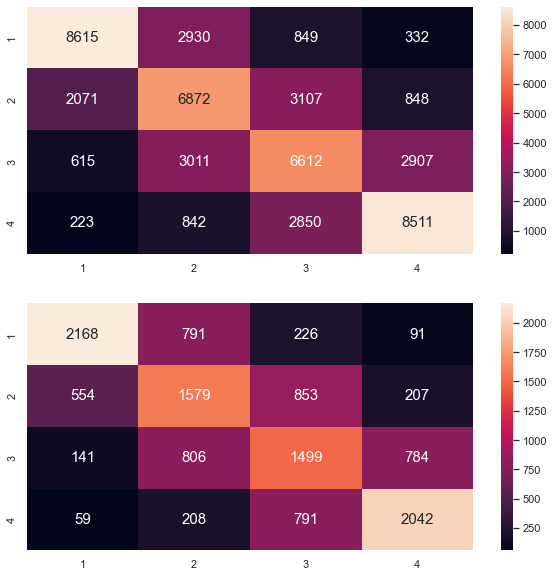

In [105]:
#train gradient boost model with non-EGIN values
model_nonEGIN = grad.fit(X_train, y_train.values.ravel())

y_pred_test = model_nonEGIN.predict(X_test)
y_pred_train = model_nonEGIN.predict(X_train)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_train, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_test, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_test))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>Training the Initial Base Model with the data from our feature engineered dataset</b>

F1 Score for Train Data: 0.6013886626084053
F1 Score for Test Data: 0.5723113027534081

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.74      0.66      0.70      3276
           2       0.46      0.49      0.47      3193
           3       0.45      0.47      0.46      3230
           4       0.66      0.66      0.66      3100

    accuracy                           0.57     12799
   macro avg       0.58      0.57      0.57     12799
weighted avg       0.58      0.57      0.57     12799



<AxesSubplot:>

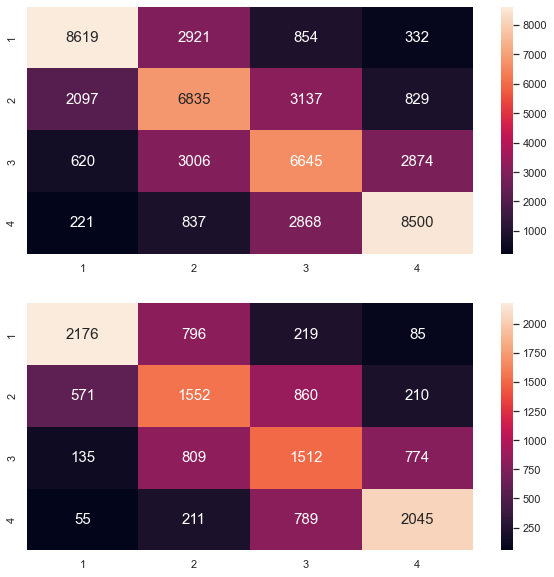

In [106]:
#train gradient boost model with EGIN values
model_EGIN = grad.fit(X_trainEGIN, y_train.values.ravel())

y_pred_testEGIN = model_EGIN.predict(X_testEGIN)
y_pred_trainEGIN = model_EGIN.predict(X_trainEGIN)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_trainEGIN, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_testEGIN, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_testEGIN))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_trainEGIN), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_testEGIN), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>Insights</b>
<br>We see that the Base Scikit-Learn gradient boosting classifier for both the regular (f1-score=0.57255) and feature engineered (f1-score=0.57231) datasets do appear to perform MUCH better than our previous decision tree classifier(f1-score=0.53621). (Note: We are comparing the f1 scores for the test data between models)
<br>
<br> Between the regular and feature engineered datasets, the difference in the f1 scores does not differ by much so we can see how for this model, feature engineering does not help much as the f1 score are relatively the same (diff=0.00024).
<br>However, for the GBM model, the f1-score difference between these 2 datasets is lower than other ML models we have implemented (i.e. CatBooster & AdaBoost) so we could hypothesise that the feature engineered dataset does suit our GBM model better than the other ML models.
<br>
<br>Checking for Overfitting: Both the training and test set accuracy are relatively comparable for both datasets. So, we can say that there is only a little overfitting.
<br>
<br>We will now further finetune our regular model's hyperparameters to improve the model’s performance.

<h3>Hyperparameters Tuning</h3>

For our model, we can tune the  maximum number of trees in the model <b>(n_estimators)</b>, sample size for each tree (% of observations to be used for fitting individual trees) <b>(subsample)</b>, max_depth of any one tree in the model <b>(max_depth)</b> and learning weights assigned predictions from each tree in the model <b>(learning_rate)</b>. 

<br>
We will use <b>RandomSearchCV</b> to obtain the optimal hyperparameters through a cross validation process.

<b>Importing the RandomSearchCV function from sklearn</b>

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

<b>Obtaining optimal hyperparameters through cross validation using RandomSearchCV</b>
<br>
<br>For the Gradient Boosting Machine, there are 4 main hyperparameters that we can tune: (n_estimators), (subsample),(max_depth) & (learning_rate).
<br>An extensive list can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
<br>
<br>We selected to tune only the following hyperparameters with a specified range (found through research and documentation on the scikit learn website) to find the model with the best performance as they are the most consequential hyperparameters for the model.
<br>
<br>We are using RandomSearchCV as it is generally very effective in finding the best parameters to improve our model. It conducts randomised searches, where all the other parameters are held constant while only the parameters we are testing and tuning are variable. It is generally computationally less expensive than GridSearchCV and is faster, so it is better suited for the hardware our team is using to train the models. As we are not changing too many variables, it is faster, while also giving us a good estimation of the optimal parameters for our model.

In [33]:
#Parameter tuning with RandomSearchCV 
# define model
est_grad = GradientBoostingClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space 
parameters = {
    'learning_rate': np.linspace(0.01,0.2,25),
    'n_estimators': [x for x in range(400,1050, 50)],              
    'subsample' : np.linspace(0.6,0.95,8),
    'max_depth': [x for x in range(3,8)],
}

# define search
RS_GB = RandomizedSearchCV(estimator=est_grad, param_distributions=parameters, scoring = 'f1_macro', n_jobs = -1, cv = cv, n_iter=125)
print(RS_GB)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=125,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.01791667, 0.02583333, 0.03375   , 0.04166667,
       0.04958333, 0.0575    , 0.06541667, 0.07333333, 0.08125   ,
       0.08916667, 0.09708333, 0.105     , 0.11291667, 0.12083333,
       0.12875   , 0.13666667, 0.14458333, 0.1525    , 0.16041667,
       0.16833333, 0.17625   , 0.18416667, 0.19208333, 0.2       ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [400, 450, 500, 550,
                                                         600, 650, 700, 750,
                                                         800, 850, 900, 950,
                                                         1000],
                                        'subsample': array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
                   scor

In [34]:
tunedmodel_nonEGIN = RS_GB.fit(X_train, y_train.values.ravel())

In [38]:
#Print all iterations run with RandomSearchCV
#Rank the iterations by the mean_test_score they produce for each test to see the best few tests and their respetive parameters
#View all tested iterations & parameters used in each test.
#Sort the dataframe by the mean test scores (rank_test_score) to see the best few tests
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 6)

temp_df= pd.DataFrame(tunedmodel_nonEGIN.cv_results_)
temp_df[["mean_test_score", "rank_test_score", "param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "params"]].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params
39,0.575075,1,0.025833,6,450,0.65,"{'subsample': 0.65, 'n_estimators': 450, 'max_..."
28,0.574470,2,0.017917,7,800,0.75,"{'subsample': 0.75, 'n_estimators': 800, 'max_..."
61,0.574403,3,0.025833,7,400,0.85,"{'subsample': 0.85, 'n_estimators': 400, 'max_..."
63,0.574393,4,0.017917,6,650,0.75,"{'subsample': 0.75, 'n_estimators': 650, 'max_..."
116,0.574272,5,0.041667,4,850,0.85,"{'subsample': 0.85, 'n_estimators': 850, 'max_..."
113,0.574193,6,0.017917,6,800,0.85,"{'subsample': 0.85, 'n_estimators': 800, 'max_..."
10,0.574151,7,0.089167,3,750,0.8,"{'subsample': 0.7999999999999999, 'n_estimator..."
103,0.574137,8,0.041667,4,900,0.85,"{'subsample': 0.85, 'n_estimators': 900, 'max_..."
85,0.574097,9,0.08125,4,400,0.7,"{'subsample': 0.7, 'n_estimators': 400, 'max_d..."
78,0.573669,10,0.049583,3,850,0.9,"{'subsample': 0.8999999999999999, 'n_estimator..."


In [75]:
#Print the iteration run on RandomSearchCV and print it's parameters
print('Best parameters after tuning hyperparameters: ', tunedmodel_nonEGIN.best_params_ ) 
print('Best score after tuning hyperparameters: ', tunedmodel_nonEGIN.best_score_ ) 

Best parameters after tuning hyperparameters:  {'subsample': 0.65, 'n_estimators': 450, 'max_depth': 6, 'learning_rate': 0.025833333333333333}
Best score after tuning hyperparameters:  0.5750753573318905


<h3>Optimal Model</h3>

<br> Based on the RandomSearchCV results, we can now build the model with the optimal hyperparamters of 'subsample': 0.65, 'n_estimators': 450, 'max_depth': 6 and 'learning_rate': 0.02583333333

In [112]:
#creating gradientboost classifier obj and printing out the base model's parameters
grad1 = GradientBoostingClassifier(n_estimators=450, subsample=0.65, max_depth=6, learning_rate = 0.02583333333333)

print(grad1.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.02583333333333, 'loss': 'deviance', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 450, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.65, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


<b>Training the Tuned Model with the data from our regular dataset (non-feature engineered dataset)</b>

F1 Score for Train Data: 0.6848140638679332
F1 Score for Test Data: 0.5783653722990676

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.73      0.68      0.71      3276
           2       0.47      0.49      0.48      3193
           3       0.46      0.47      0.46      3230
           4       0.66      0.67      0.67      3100

    accuracy                           0.58     12799
   macro avg       0.58      0.58      0.58     12799
weighted avg       0.58      0.58      0.58     12799



<AxesSubplot:>

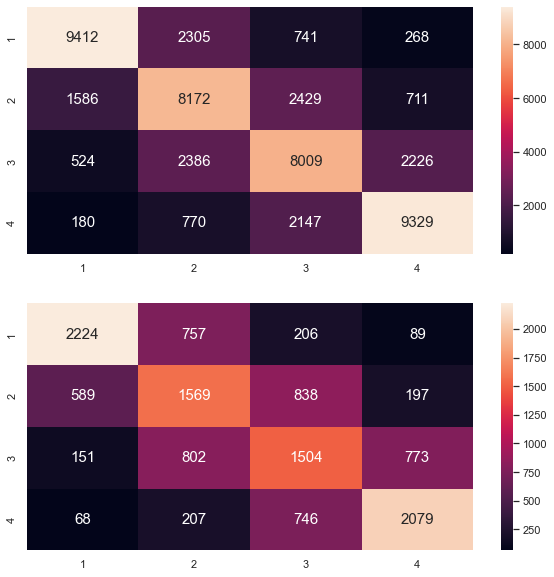

In [113]:
#train gradient boost model with non-EGIN values
model_nonEGIN1 = grad1.fit(X_train, y_train.values.ravel())

y_pred_test1 = model_nonEGIN1.predict(X_test)
y_pred_train1 = model_nonEGIN1.predict(X_train)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_train1, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_test1, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_test1))


fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_train1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_test1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>See the most Important/Significant variables in the new Tuned Model that determine what factor affects one's salary the most as predicted by our Model</b>

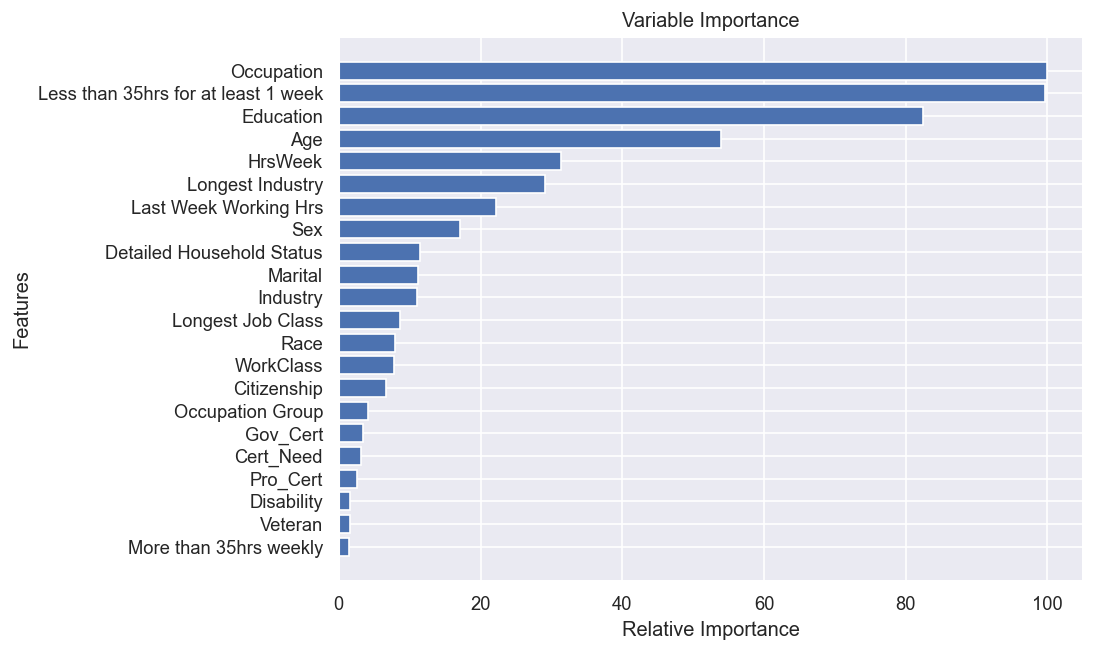

Importance of each variable in Graph above(Desc. Order):
 [100.    99.7   82.4   53.98  31.31  29.11  22.11  17.15  11.47  11.2
  11.05   8.58   7.98   7.71   6.59   4.11   3.35   3.06   2.51   1.59
   1.51   1.41]


In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot feature importance
feature_importance = model_nonEGIN1.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx  = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5

#plot the features
plt.figure(figsize=(8, 6), dpi=120)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.iloc[ : , sorted_idx])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.title("Variable Importance")

plt.show()

temp=feature_importance
temp=np.sort(temp)
temp=np.round_(temp, decimals = 2)
print("Importance of each variable in Graph above(Desc. Order):\n",temp[::-1])

<b>Training the Tuned Model with the data from our feature engineered dataset</b>

F1 Score for Train Data: 0.6837012327579707
F1 Score for Test Data: 0.576757141307464

Classificiation Report on Test Data:
               precision    recall  f1-score   support

           1       0.73      0.68      0.71      3276
           2       0.47      0.49      0.48      3193
           3       0.45      0.46      0.46      3230
           4       0.66      0.67      0.66      3100

    accuracy                           0.57     12799
   macro avg       0.58      0.58      0.58     12799
weighted avg       0.58      0.57      0.58     12799



<AxesSubplot:>

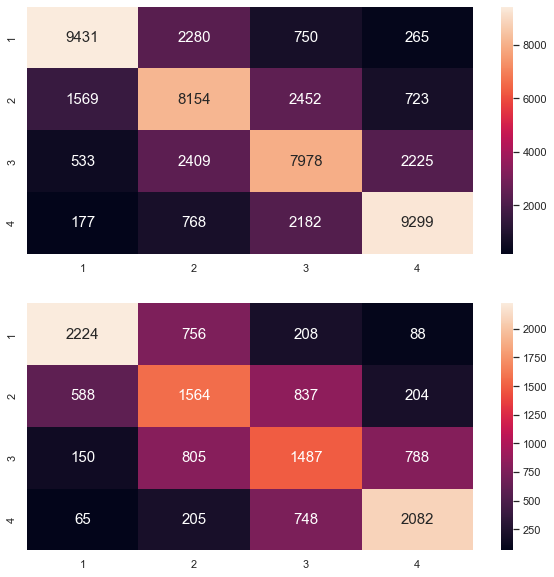

In [115]:
#train gradient boost model with EGIN values
model_EGIN1 = grad1.fit(X_trainEGIN, y_train.values.ravel())

y_pred_testEGIN1 = model_EGIN1.predict(X_testEGIN)
y_pred_trainEGIN1 = model_EGIN1.predict(X_trainEGIN)

print('F1 Score for Train Data:', f1_score(y_train, y_pred_trainEGIN1, average='macro'))
print('F1 Score for Test Data:', f1_score(y_test, y_pred_testEGIN1, average='macro'))

print('\nClassificiation Report on Test Data:\n', metrics.classification_report(y_test, y_pred_testEGIN1))

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, y_pred_trainEGIN1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, y_pred_testEGIN1), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])


<b>See the most Important/Significant variables in the new Tuned Model that determine what factor affects one's salary the most as predicted by our Model</b>

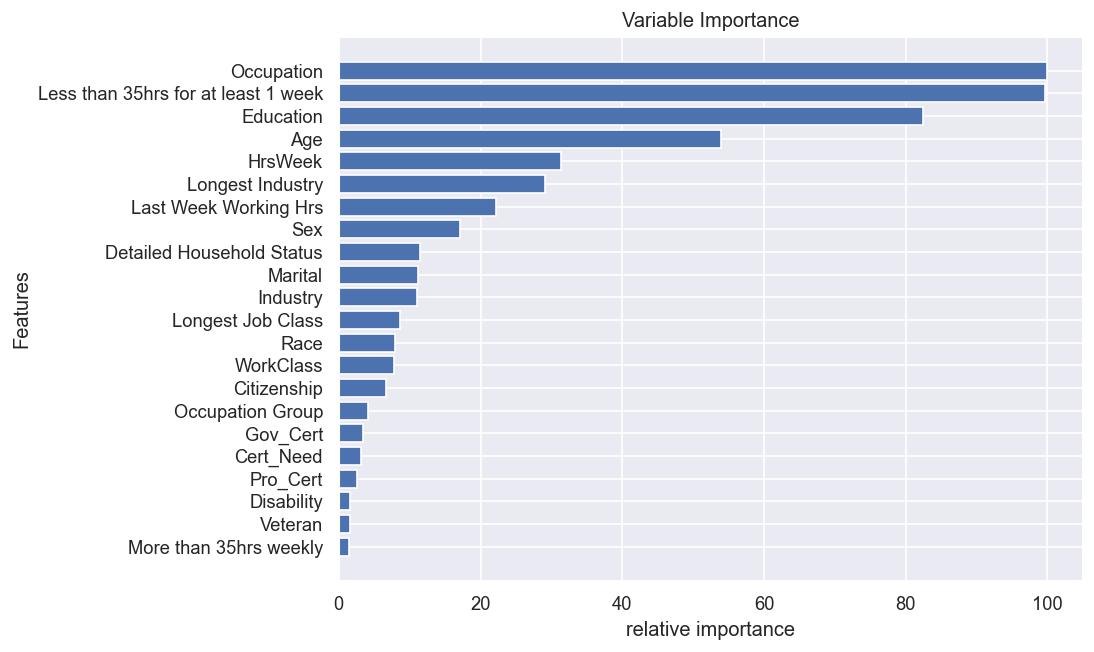

Importance of each variable in Graph above(Desc. Order):
 [100.    99.7   82.4   53.98  31.31  29.11  22.11  17.15  11.47  11.2
  11.05   8.58   7.98   7.71   6.59   4.11   3.35   3.06   2.51   1.59
   1.51   1.41]


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot features importance
feature_importance1 = model_EGIN1.feature_importances_
#make importances relative to max importance
feature_importance1 = 100.0*(feature_importance/feature_importance.max())
sorted_idx1  = np.argsort(feature_importance1)
pos1 = np.arange(sorted_idx1.shape[0])+0.5

#plot the features
plt.figure(figsize=(8, 6), dpi=120)
plt.barh(pos1, feature_importance1[sorted_idx1], align='center')
plt.yticks(pos1, X_test.iloc[ : , sorted_idx1])
plt.xlabel("relative importance")
plt.ylabel("Features")
plt.title("Variable Importance")

plt.show()

temp1=feature_importance1
temp1=np.sort(temp1)
temp1=np.round_(temp1, decimals = 2)
print("Importance of each variable in Graph above(Desc. Order):\n",temp1[::-1])

<h3>Final Insights</h3>

<b>Final Insights</b>
<ol>
<li>Results Analysis for the Random Grid Search-> After 125 iterations in the Random Grid Search with different optimal hyperparameters, we noticed a slight improvement in the f1-scores of the GBM Classifier model on both the regular (f-1 score = 0.57836 after tuning vs f-1 score = 0.57255 on the initial model) and feature engineered dataset (f-1 score = 0.57675 after tuning vs f-1 score = 0.57231 on the initial model). We believe with a more GPU-intensive hardware, we can further improve these accuracy scores by trying a higher iteration number for our Random Grid Search. </li>       
<br>
<li>Feature Engineering-> Initially the feature engineered dataset performed around the same as our regular dataset on the base GBM Model, however after tuning our model, we saw the gap in terms of accuracy slightly widening between the 2 datasets. However, this gap was not significant so we could conclude that they performed roughly the same. </li>
<br>
<li>Optimal Features-> After we tuned our model, we found the most relevant features to our model and thus the most consequential features affecting a person’s salary: the occupation they are working in (most significant), whether you work less than 35 hours a week or not, their highest attained education status and lastly how long they have worked in a week. Some features were a little less relevant to determine one’s salary: Whether you work more than 35 hours a week or not (least significant), whether you have a government-issued Professional Certificate, whether you are disabled and whether you are an army veteran</li>
<br>
<li>Checking for Overfitting: After tuning, both the training and test set accuracy have a significant deviation, a much larger difference in f1-scores (almost a 0.1 f1-score difference between the test and train data) than other ML models, and thus this could mean that there is overfitting of data in this model. </li>
<br>
<li>Overall Model Evaluation-> The GBM Classifier does in fact perform much better than the Decision Tree and some other ML models we implemented as seen by the differences in the F1-scores across them. However, due to the fact that the model might be overfitting the data, we can conclude that this is not be the best ML model that we have implemented to solve our defined problem as to what determines a person’s income.</li>
</ol>  